# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
system("awk '/MemFree/ {print $2}' /proc/meminfo", intern=TRUE)

[1] "1716600"

In [2]:
# REPLICAR FILAS INDICADAS EN LA COLUMNA COUNT
df<-read.csv("datos/BCSC_risk_factors_summarized.csv",sep=",",header = T)

In [3]:
#ponemos los duplicados donde la columna count nos indique
df <- df[rep(row.names(df), df$count), 1:(ncol(df)-1)]

In [4]:
#seleccionamos muestra
set.seed(12345)
df2 <- df[sample(nrow(df),5000),]

In [25]:
#ponemos los duplicados donde la columna count nos indique
n.repetidos <- df2$count
df2_ampliado <- df2[rep(seq_len(nrow(df2)), n.repetidos),]

In [26]:
df2_ampliado[df2_ampliado == 9] <- NA

In [27]:
#convertimos a factores las columnas que nos interesen
tipos <- c("Almost entirely fat","Scattered fibroglandular densities","Heterogeneously dense","Extremely dense","Desconocido")
df2$BIRADS_breast_density <- factor(tipos)

In [28]:
head(df2)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
825121,2007,2,1,0,1,4,Almost entirely fat,0,1,2,0,0,5
1002378,2008,8,6,0,0,1,Scattered fibroglandular densities,0,2,4,0,0,2
870992,2007,6,5,0,9,3,Heterogeneously dense,1,2,3,1,0,1
1014224,2008,10,1,0,0,9,Extremely dense,9,2,2,0,0,1
522470,2004,6,1,0,9,4,Desconocido,0,2,1,0,0,8
190423,2001,8,1,1,1,1,Almost entirely fat,0,2,9,0,0,19


In [20]:

#NO PUEDO TRANSFORMAR A FACTOR
grupo_etnico <- c("Non-Hispanic white","Non-Hispanic black", "Asian/Pacific Islander" , "Native American" , "Hispanic", "Other/mixed","Desconocido")
grupo_etnico
df2$race_eth <- factor(grupo_etnico)

[1] "Non-Hispanic white"     "Non-Hispanic black"     "Asian/Pacific Islander"
[4] "Native American"        "Hispanic"               "Other/mixed"           
[7] "Desconocido"

ERROR: Error in `$<-.data.frame`(`*tmp*`, "race_eth", value = structure(c(6L, : replacement has 7 rows, data has 5000


In [16]:
str(df2)

'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2007 2008 2007 2008 2004 2001 2003 2004 2007 2009 ...
 $ age_group_5_years    : int  2 8 6 10 6 8 4 10 4 11 ...
 $ race_eth             : int  1 6 5 1 1 1 3 5 1 1 ...
 $ first_degree_hx      : int  0 0 0 0 0 1 0 1 0 1 ...
 $ age_menarche         : int  1 0 9 0 9 1 9 9 9 0 ...
 $ age_first_birth      : int  4 1 3 9 4 1 3 1 3 4 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "Almost entirely fat",..: 1 5 4 3 2 1 5 4 3 2 ...
 $ current_hrt          : int  0 0 1 9 0 0 0 0 0 0 ...
 $ menopaus             : int  1 2 2 2 2 2 1 2 1 2 ...
 $ bmi_group            : int  2 4 3 2 1 9 3 4 1 2 ...
 $ biophx               : int  0 0 1 0 0 0 0 0 1 1 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 0 1 1 ...
 $ count                : int  5 2 1 1 8 19 3 1 6 1 ...


In [12]:
antecedente_familiar <- c("NO","SI")
df2$first_degree_hx


#ponemos los duplicados donde la columna count nos indique
n.repetidos <- df2$count
df2_ampliado <- df2[rep(seq_len(nrow(df2)), n.repetidos),]

ERROR: Error in `$<-.data.frame`(`*tmp*`, "race_eth", value = structure(c(6L, : replacement has 7 rows, data has 5000


In [6]:
str(nrow(df2))
str(n.repetidos)

 int 5000
 int [1:5000] 5 2 1 1 8 19 3 1 6 1 ...


In [7]:
str(df2_ampliado)

'data.frame':	27294 obs. of  13 variables:
 $ year                 : int  2007 2007 2007 2007 2007 2008 2008 2007 2008 2004 ...
 $ age_group_5_years    : int  2 2 2 2 2 8 8 6 10 6 ...
 $ race_eth             : int  1 1 1 1 1 6 6 5 1 1 ...
 $ first_degree_hx      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age_menarche         : int  1 1 1 1 1 0 0 9 0 9 ...
 $ age_first_birth      : int  4 4 4 4 4 1 1 3 9 4 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "Almost entirely fat",..: 1 1 1 1 1 5 5 4 3 2 ...
 $ current_hrt          : int  0 0 0 0 0 0 0 1 9 0 ...
 $ menopaus             : int  1 1 1 1 1 2 2 2 2 2 ...
 $ bmi_group            : int  2 2 2 2 2 4 4 3 2 1 ...
 $ biophx               : int  0 0 0 0 0 0 0 1 0 0 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 0 0 0 ...
 $ count                : int  5 5 5 5 5 2 2 1 1 8 ...


El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [157]:
str(df2)
# FALTA CAMBIAR DESCONOCIDO (9) POR NA
#df2$age_group_5_years<-factor(df2$age_group_5_years)
df2$age_group_5_years<-factor(df2$age_group_5_years,labels = c("23","32","37","42","47","52","57","62","67","72","77","82","87"))

str(df2)
head(df2)

'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2007 2008 2007 2008 2004 2001 2003 2004 2007 2009 ...
 $ age_group_5_years    : int  2 8 6 10 6 8 4 10 4 11 ...
 $ race_eth             : int  1 6 5 1 1 1 3 5 1 1 ...
 $ first_degree_hx      : int  0 0 0 0 0 1 0 1 0 1 ...
 $ age_menarche         : int  1 0 9 0 9 1 9 9 9 0 ...
 $ age_first_birth      : int  4 1 3 9 4 1 3 1 3 4 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "Almost entirely fat",..: 1 5 4 3 2 1 5 4 3 2 ...
 $ current_hrt          : int  0 0 1 9 0 0 0 0 0 0 ...
 $ menopaus             : int  1 2 2 2 2 2 1 2 1 2 ...
 $ bmi_group            : int  2 4 3 2 1 9 3 4 1 2 ...
 $ biophx               : int  0 0 1 0 0 0 0 0 1 1 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 0 1 1 ...
 $ count                : int  5 2 1 1 8 19 3 1 6 1 ...
'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2007 2008 2007 2008 2004 2001 2003 2004 2007 2009 ...
 $ age_group_5_years    : Factor w/ 13 lev

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
825121,2007,32,1,0,1,4,Almost entirely fat,0,1,2,0,0,5
1002378,2008,62,6,0,0,1,Scattered fibroglandular densities,0,2,4,0,0,2
870992,2007,52,5,0,9,3,Heterogeneously dense,1,2,3,1,0,1
1014224,2008,72,1,0,0,9,Extremely dense,9,2,2,0,0,1
522470,2004,52,1,0,9,4,Desconocido,0,2,1,0,0,8
190423,2001,62,1,1,1,1,Almost entirely fat,0,2,9,0,0,19


In [158]:
#Pasar edades a números
unique(df2$age_group_5_years)
str(df2$age_group_5_years)
ageVectors<-c(23,32,37,42,47,52,57,62,67,72,77,82,87)
df2$edad_estimada<-ageVectors[as.numeric(df2$age_group_5_years)]
#df2$age_group_5_years
head(df2)
#df2$edad_estimada

[1] 32 62 52 72 42 77 57 47 67 37 87 82 23
Levels: 23 32 37 42 47 52 57 62 67 72 77 82 87

 Factor w/ 13 levels "23","32","37",..: 2 8 6 10 6 8 4 10 4 11 ...


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,edad_estimada
825121,2007,32,1,0,1,4,Almost entirely fat,0,1,2,0,0,5,32
1002378,2008,62,6,0,0,1,Scattered fibroglandular densities,0,2,4,0,0,2,62
870992,2007,52,5,0,9,3,Heterogeneously dense,1,2,3,1,0,1,52
1014224,2008,72,1,0,0,9,Extremely dense,9,2,2,0,0,1,72
522470,2004,52,1,0,9,4,Desconocido,0,2,1,0,0,8,52
190423,2001,62,1,1,1,1,Almost entirely fat,0,2,9,0,0,19,62


#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [69]:
library(ggplot2)

In [75]:
df2$first_degree_hx<-factor(df2$first_degree_hx)


In [77]:
df2$edad_estimada <- as.integer(df2$edad_estimada)

In [139]:
df4 <- df2[,c('edad_estimada','first_degree_hx')]

In [140]:
str (df4)

'data.frame':	5000 obs. of  2 variables:
 $ edad_estimada  : int  32 62 52 72 52 62 42 72 42 77 ...
 $ first_degree_hx: Factor w/ 3 levels "0","1","9": 1 1 1 1 1 2 1 2 1 2 ...


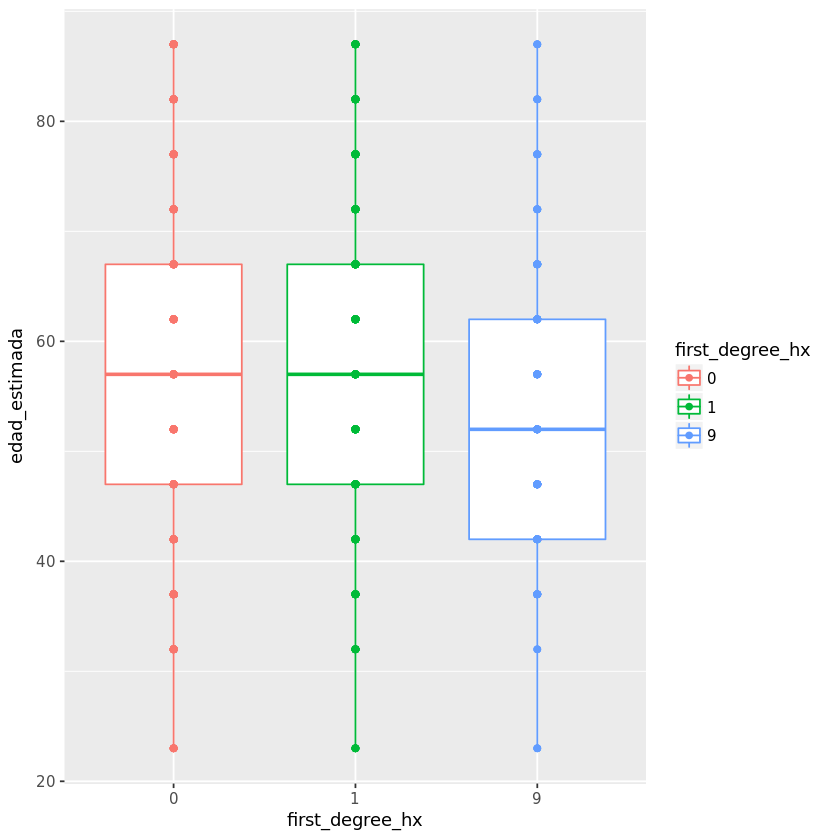

In [159]:

ggplot (df4, aes(x=first_degree_hx, y=edad_estimada, color=first_degree_hx))+geom_boxplot()+geom_point()


In [121]:
df_edad_saf <- subset(df4, first_degree_hx == 0)
df_edad_caf <- subset(df4, first_degree_hx == 1)


In [122]:
str(df_edad_saf)
str(df_edad_caf)


'data.frame':	3390 obs. of  2 variables:
 $ edad_estimada  : num  32 62 52 72 52 42 42 52 57 47 ...
 $ first_degree_hx: Factor w/ 3 levels "0","1","9": 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	1305 obs. of  2 variables:
 $ edad_estimada  : num  62 72 77 62 72 67 67 57 87 77 ...
 $ first_degree_hx: Factor w/ 3 levels "0","1","9": 2 2 2 2 2 2 2 2 2 2 ...


[1] 57.80855

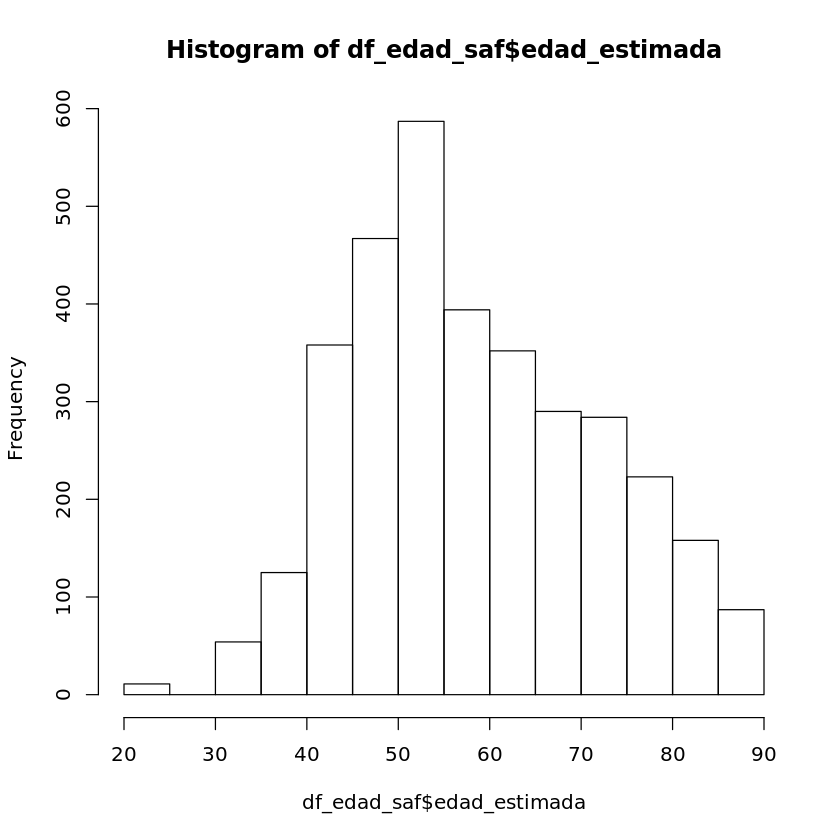

In [123]:
hist(df_edad_saf$edad_estimada)
mean(df_edad_saf$edad_estimada)

[1] 59.04138

 num [1:1305] 62 72 77 62 72 67 67 57 87 77 ...


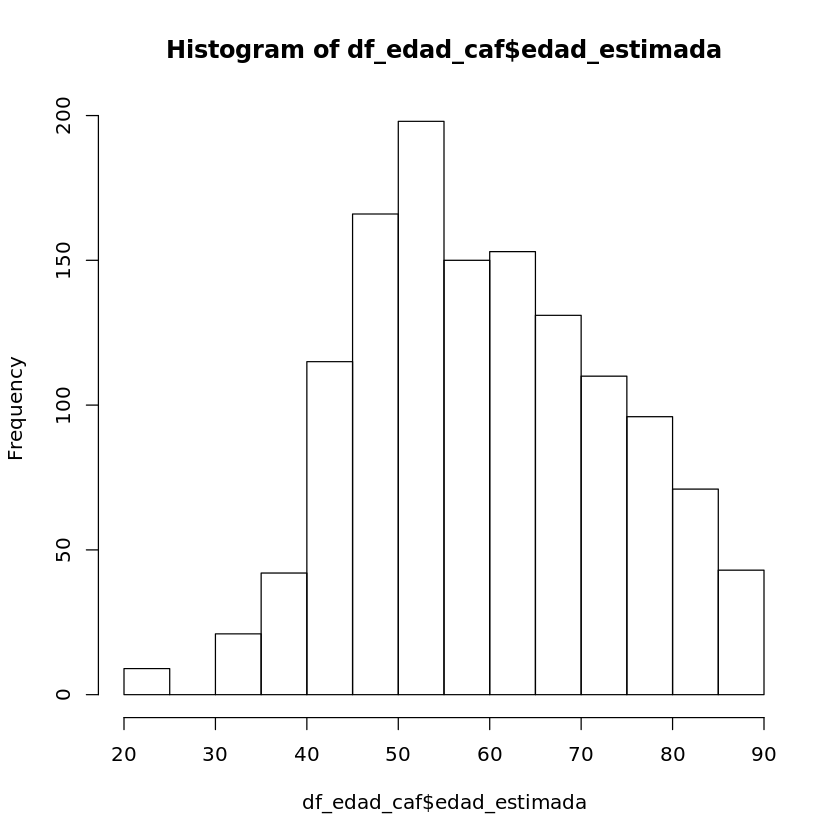

In [124]:
hist(df_edad_caf$edad_estimada)
mean(df_edad_caf$edad_estimada)
str(df_edad_caf$edad_estimada)

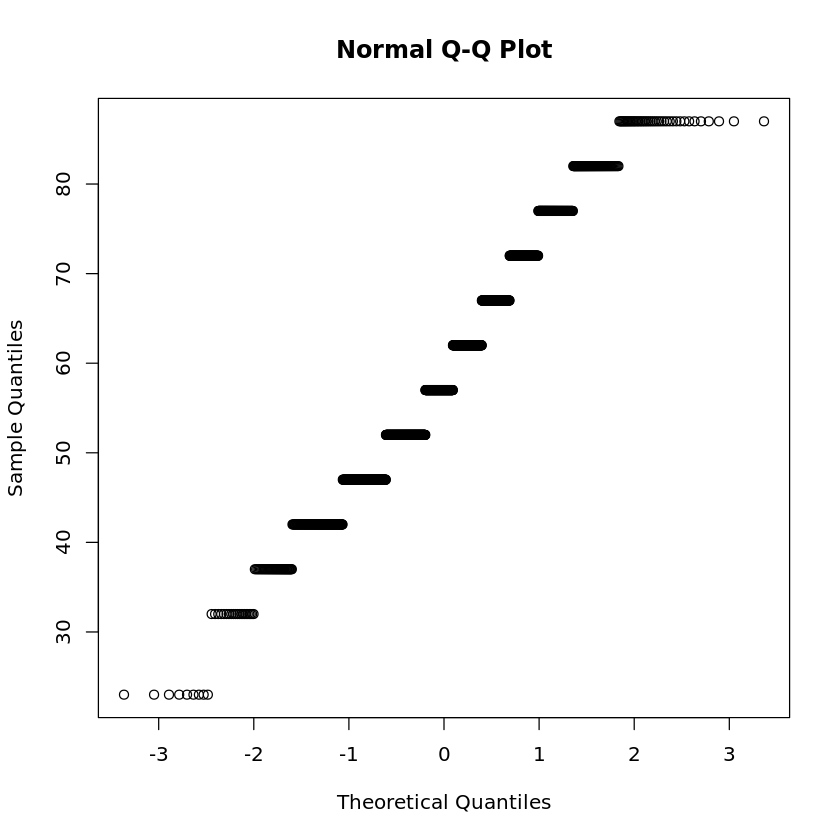

In [125]:
qqnorm(df_edad_caf$edad_estimada)

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [126]:
t.test(df_edad_caf$edad_estimada,df_edad_saf$edad_estimada)


	Welch Two Sample t-test

data:  df_edad_caf$edad_estimada and df_edad_saf$edad_estimada
t = 2.7788, df = 2309.9, p-value = 0.0055
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3628207 2.1028287
sample estimates:
mean of x mean of y 
 59.04138  57.80855 


Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

In [141]:
ggplot (df4, aes(x=first_degree_hx,y=edad_estimada, color=first_degree_hx))+geom_boxplot()+geom_density()

ERROR while rich displaying an object: Error in eval(expr, envir, enclos): object 'y' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, envir, enclos)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. by_layer(function

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

In [160]:
str(df2)

'data.frame':	5000 obs. of  14 variables:
 $ year                 : int  2007 2008 2007 2008 2004 2001 2003 2004 2007 2009 ...
 $ age_group_5_years    : Factor w/ 13 levels "23","32","37",..: 2 8 6 10 6 8 4 10 4 11 ...
 $ race_eth             : int  1 6 5 1 1 1 3 5 1 1 ...
 $ first_degree_hx      : int  0 0 0 0 0 1 0 1 0 1 ...
 $ age_menarche         : int  1 0 9 0 9 1 9 9 9 0 ...
 $ age_first_birth      : int  4 1 3 9 4 1 3 1 3 4 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "Almost entirely fat",..: 1 5 4 3 2 1 5 4 3 2 ...
 $ current_hrt          : int  0 0 1 9 0 0 0 0 0 0 ...
 $ menopaus             : int  1 2 2 2 2 2 1 2 1 2 ...
 $ bmi_group            : int  2 4 3 2 1 9 3 4 1 2 ...
 $ biophx               : int  0 0 1 0 0 0 0 0 1 1 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 0 1 1 ...
 $ count                : int  5 2 1 1 8 19 3 1 6 1 ...
 $ edad_estimada        : num  32 62 52 72 52 62 42 72 42 77 ...


In [148]:
str(df2)

 Factor w/ 5 levels "1","2","3","4",..: 3 2 3 2 4 2 5 2 5 1 ...


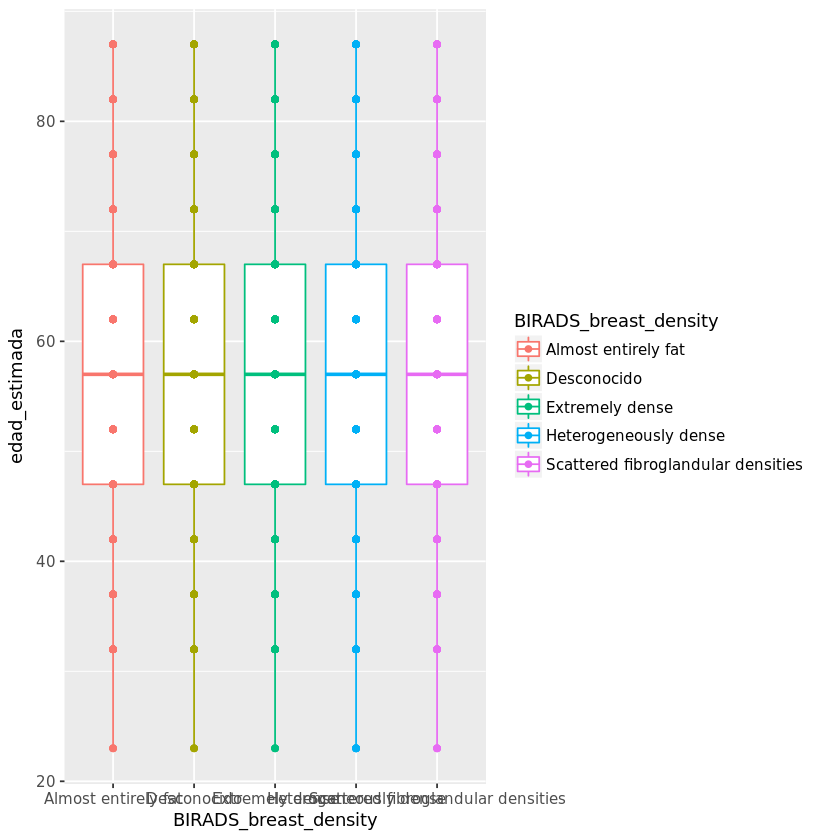

In [161]:
ggplot (df2, aes(x=BIRADS_breast_density,y=edad_estimada, color=BIRADS_breast_density))+geom_boxplot()+geom_point()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [162]:
str(df2)




'data.frame':	5000 obs. of  14 variables:
 $ year                 : int  2007 2008 2007 2008 2004 2001 2003 2004 2007 2009 ...
 $ age_group_5_years    : Factor w/ 13 levels "23","32","37",..: 2 8 6 10 6 8 4 10 4 11 ...
 $ race_eth             : int  1 6 5 1 1 1 3 5 1 1 ...
 $ first_degree_hx      : int  0 0 0 0 0 1 0 1 0 1 ...
 $ age_menarche         : int  1 0 9 0 9 1 9 9 9 0 ...
 $ age_first_birth      : int  4 1 3 9 4 1 3 1 3 4 ...
 $ BIRADS_breast_density: Factor w/ 5 levels "Almost entirely fat",..: 1 5 4 3 2 1 5 4 3 2 ...
 $ current_hrt          : int  0 0 1 9 0 0 0 0 0 0 ...
 $ menopaus             : int  1 2 2 2 2 2 1 2 1 2 ...
 $ bmi_group            : int  2 4 3 2 1 9 3 4 1 2 ...
 $ biophx               : int  0 0 1 0 0 0 0 0 1 1 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 0 1 1 ...
 $ count                : int  5 2 1 1 8 19 3 1 6 1 ...
 $ edad_estimada        : num  32 62 52 72 52 62 42 72 42 77 ...


In [163]:
#ANOVA sólo se puede aplicar en gaussianas
#aplicamos el test de Shapiro

for (v in levels(df2$BIRADS_breast_density)){
    print(paste("Tipo:", v, "pvalue:",
               shapiro.test(df2$BIRADS_breast_density[v])$p.value))
}

bartlett.test(data=df2,edad_estimada ~ df2$BIRADS_breast_density)

ERROR: Error: is.numeric(x) is not TRUE


In [ ]:
#Test de Tukey
Es utilizado para encontrar las medias que son significativamente diferentes en cada uno de los grupos.
Compara las medias de cada grupo.


#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [30]:
# chi cuadrado
tipo1 <- table(df2$BIRADS_breast_density)
tipo1


               Almost entirely fat                        Desconocido 
                              1000                               1000 
                   Extremely dense              Heterogeneously dense 
                              1000                               1000 
Scattered fibroglandular densities 
                              1000 

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

¿Depende el tipo de cancer BIRADS del grupo étnico?

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA